<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
push!(LOAD_PATH, ".")
using RobustOptimization
using Ipopt, JuMP, PyPlot
using ScikitLearn
@sk_import model_selection: train_test_split
@sk_import metrics: roc_curve
@sk_import metrics: roc_auc_score
@sk_import metrics: accuracy_score
@sk_import metrics: classification_report
path_train = "datasets/ionosphere_scale"
nbfeatures = 34
data_train = read_data_libsvm(path_train, nbfeatures);
# xtr, xte, ytr, yte = train_test_split(data_train[:,1:end-1], data_train[:,end], train_size = 0.15)
# ab_train = hcat(xtr, ytr)
# aux_train = ab_train[ab_train[:,end] .< 0,:]
# ll_train = vcat(aux_train,data_train[data_train[:,end].>0,:])

# xtr, xte, ytr, yte = train_test_split(data_train[:,1:end-1], data_train[:,end], train_size = 0.6)
# df_train = hcat(xtr, ytr)
# # low_train = hcat(xtr, ytr)
# df_aux= hcat(xte, yte);

In [2]:
histo_normal = []
histo_as = []
histo_normal_KL = []
histo_as_KL = []
histo_normal_was = []
histo_as_was = []
histo_normal_KL2 = []
histo_as_KL2 = []
histo_normal_was2 = []
histo_as_was2 = []
solver = IpoptSolver(print_level = 0)
N = size(data_train)[1]
ϵ = 0.05
verbosity = 50
itmax = 250
sample = 100

ambiguity = "KLdivergence"
robustModel = RobustModel(N, nbfeatures, ϵ, ambiguity, LogisticRegression())
α = 1/norm(robustModel.descent_direction)
# α = 0.1
projParams = ProjParams(Int(40), 1e-5, sample, para_proj=Sequential(), para_inter=Sequential())
optParams = OptParams(itmax, 1e-5, α, verbosity = verbosity);
# df_train, df_aux = create_data("diabetes_scale", nbfeatures, 0.2, train_test_split)

In [5]:
ϵKL = 0.001
ϵWAS = 0.003

0.003

In [18]:
for i in 1:1000
    println(" ")
    println(" ")
    println("i = ", i)
    print("Iteration in progress")
    xtr, xte, ytr, yte = train_test_split(data_train[:,1:end-1], data_train[:,end], train_size = 0.6)
    df_train = hcat(xtr, ytr)
    df_aux= hcat(xte, yte);
    N = size(df_train)[1]

    xnormal = normal_opt(df_train, solver, robustModel.regressionModel)
    ras = roc_auc_score(df_aux[:,end], positive_rate(xnormal,df_aux))
    as = accuracy_score(df_aux[:,end], pred(df_aux, xnormal, LogisticRegression()))
    push!(histo_normal, ras)
    push!(histo_as, as)
    
    xKL = KL_opt(df_train, 0.001, solver, robustModel.regressionModel)
    ras = roc_auc_score(df_aux[:,end], positive_rate(xKL,df_aux))
    as = accuracy_score(df_aux[:,end], pred(df_aux, xKL, LogisticRegression()))
    push!(histo_normal_KL2, ras)
    push!(histo_as_KL2, as)
    
#     xwas = DRO_opt(df_train, 0.001, solver, robustModel.regressionModel)
#     ras = roc_auc_score(df_aux[:,end], positive_rate(xwas,df_aux))
#     as = accuracy_score(df_aux[:,end], pred(df_aux, xwas, LogisticRegression()))
#     push!(histo_normal_was2, ras)
#     push!(histo_as_was2, as)
    
#     ϵ = ϵKL
#     verbosity = 50
#     itmax = 2000
#     sample = 100
#     ambiguity = "KLdivergence"
#     robustModel = RobustModel(N, nbfeatures, ϵ, ambiguity, LogisticRegression())
#     α = 1/norm(robustModel.descent_direction)
#     projParams = ProjParams(Int(40), 1e-5, sample, para_proj=Sequential(), para_inter=Sequential())
#     optParams = OptParams(itmax, 1e-5, α, verbosity = verbosity);
#     robustModel = RobustModel(N, nbfeatures, ϵ, ambiguity, LogisticRegression())
#     x0 = initialize(df_train, robustModel, KLConstraint())
#     xalg, yalg, dm, mem, mini = run_algo(x0, df_train, robustModel, optParams, projParams)
#     xrobust1 = getsolution(xalg, ambiguity, nbfeatures)
#     xrobust2 = getsolution(mem, ambiguity, nbfeatures)
#     ras = roc_auc_score(df_aux[:,end], positive_rate(xrobust1,df_aux))
#     as = accuracy_score(df_aux[:,end], pred(df_aux, xrobust1, LogisticRegression()))
#     push!(histo_normal_KL, ras)
#     push!(histo_as_KL, as)
#     ras = roc_auc_score(df_aux[:,end], positive_rate(xrobust2,df_aux))
#     as = accuracy_score(df_aux[:,end], pred(df_aux, xrobust2, LogisticRegression()))
#     push!(histo_normal_KL2, ras)
#     push!(histo_as_KL2, as)
    
#     ϵ = ϵWAS
#     verbosity = 10
#     itmax = 500
#     sample = 128
#     ambiguity = "wasserstein"
#     robustModel = RobustModel(N, nbfeatures, ϵ, ambiguity, LogisticRegression())
#     α = 1/norm(robustModel.descent_direction)
#     projParams = ProjParams(Int(1000), 1e-5, sample, para_proj=Sequential(), para_inter=Sequential())
#     optParams = OptParams(itmax, 1e-5, α, verbosity = verbosity);
#     robustModel = RobustModel(N, nbfeatures, ϵ, ambiguity, LogisticRegression())
#     x0 = init_proj(df_train, robustModel, projParams);
#     xalg, yalg, dm, mem, mini = run_algo(x0, df_train, robustModel, optParams, projParams)
#     xrobust1 = getsolution(xalg, ambiguity, nbfeatures)
#     xrobust2 = getsolution(mem, ambiguity, nbfeatures)
    
#     ras = roc_auc_score(df_aux[:,end], positive_rate(xrobust1,df_aux))
#     as = accuracy_score(df_aux[:,end], pred(df_aux, xrobust1, LogisticRegression()))
#     push!(histo_normal_was, ras)
#     push!(histo_as_was, as)
#     ras = roc_auc_score(df_aux[:,end], positive_rate(xrobust2,df_aux))
#     as = accuracy_score(df_aux[:,end], pred(df_aux, xrobust2, LogisticRegression()))
#     push!(histo_normal_was2, ras)
#     push!(histo_as_was2, as)
end

 
 
i = 1
Iteration in progress 
 
i = 2
Iteration in progress 
 
i = 3
Iteration in progress 
 
i = 4
Iteration in progress 
 
i = 5
Iteration in progress 
 
i = 6
Iteration in progress 
 
i = 7
Iteration in progress 
 
i = 8
Iteration in progress 
 
i = 9
Iteration in progress 
 
i = 10
Iteration in progress 
 
i = 11
Iteration in progress 
 
i = 12
Iteration in progress 
 
i = 13
Iteration in progress 
 
i = 14
Iteration in progress 
 
i = 15
Iteration in progress 
 
i = 16
Iteration in progress 
 
i = 17
Iteration in progress 
 
i = 18
Iteration in progress 
 
i = 19
Iteration in progress 
 
i = 20
Iteration in progress 
 
i = 21
Iteration in progress 
 
i = 22
Iteration in progress 
 
i = 23
Iteration in progress 
 
i = 24
Iteration in progress 
 
i = 25
Iteration in progress 
 
i = 26
Iteration in progress 
 
i = 27
Iteration in progress 
 
i = 28
Iteration in progress 
 
i = 29
Iteration in progress 
 
i = 30
Iteration in progress 
 
i = 31
Iteration in progress 
 
i = 32
Iterat

 
 
i = 195
Iteration in progress 
 
i = 196
Iteration in progress 
 
i = 197
Iteration in progress 
 
i = 198
Iteration in progress 
 
i = 199
Iteration in progress 
 
i = 200
Iteration in progress 
 
i = 201
Iteration in progress 
 
i = 202
Iteration in progress 
 
i = 203
Iteration in progress 
 
i = 204
Iteration in progress 
 
i = 205
Iteration in progress 
 
i = 206
Iteration in progress 
 
i = 207
Iteration in progress 
 
i = 208
Iteration in progress 
 
i = 209
Iteration in progress 
 
i = 210
Iteration in progress 
 
i = 211
Iteration in progress 
 
i = 212
Iteration in progress 
 
i = 213
Iteration in progress 
 
i = 214
Iteration in progress 
 
i = 215
Iteration in progress 
 
i = 216
Iteration in progress 
 
i = 217
Iteration in progress 
 
i = 218
Iteration in progress 
 
i = 219
Iteration in progress 
 
i = 220
Iteration in progress 
 
i = 221
Iteration in progress 
 
i = 222
Iteration in progress 
 
i = 223
Iteration in progress 
 
i = 224
Iteration in progress 
 
i = 22

Iteration in progress 
 
i = 444
Iteration in progress 
 
i = 445
Iteration in progress 
 
i = 446
Iteration in progress 
 
i = 447
Iteration in progress 
 
i = 448
Iteration in progress 
 
i = 449
Iteration in progress 
 
i = 450
Iteration in progress 
 
i = 451
Iteration in progress 
 
i = 452
Iteration in progress 
 
i = 453
Iteration in progress 
 
i = 454
Iteration in progress 
 
i = 455
Iteration in progress 
 
i = 456
Iteration in progress 
 
i = 457
Iteration in progress 
 
i = 458
Iteration in progress 
 
i = 459
Iteration in progress 
 
i = 460
Iteration in progress 
 
i = 461
Iteration in progress 
 
i = 462
Iteration in progress 
 
i = 463
Iteration in progress 
 
i = 464
Iteration in progress 
 
i = 465
Iteration in progress 
 
i = 466
Iteration in progress 
 
i = 467
Iteration in progress 
 
i = 468
Iteration in progress 
 
i = 469
Iteration in progress 
 
i = 470
Iteration in progress 
 
i = 471
Iteration in progress 
 
i = 472
Iteration in progress 
 
i = 473
Iteration 

Iteration in progress 
 
i = 692
Iteration in progress 
 
i = 693
Iteration in progress 
 
i = 694
Iteration in progress 
 
i = 695
Iteration in progress 
 
i = 696
Iteration in progress 
 
i = 697
Iteration in progress 
 
i = 698
Iteration in progress 
 
i = 699
Iteration in progress 
 
i = 700
Iteration in progress 
 
i = 701
Iteration in progress 
 
i = 702
Iteration in progress 
 
i = 703
Iteration in progress 
 
i = 704
Iteration in progress 
 
i = 705
Iteration in progress 
 
i = 706
Iteration in progress 
 
i = 707
Iteration in progress 
 
i = 708
Iteration in progress 
 
i = 709
Iteration in progress 
 
i = 710
Iteration in progress 
 
i = 711
Iteration in progress 
 
i = 712
Iteration in progress 
 
i = 713
Iteration in progress 
 
i = 714
Iteration in progress 
 
i = 715
Iteration in progress 
 
i = 716
Iteration in progress 
 
i = 717
Iteration in progress 
 
i = 718
Iteration in progress 
 
i = 719
Iteration in progress 
 
i = 720
Iteration in progress 
 
i = 721
Iteration 

Iteration in progress 
 
i = 940
Iteration in progress 
 
i = 941
Iteration in progress 
 
i = 942
Iteration in progress 
 
i = 943
Iteration in progress 
 
i = 944
Iteration in progress 
 
i = 945
Iteration in progress 
 
i = 946
Iteration in progress 
 
i = 947
Iteration in progress 
 
i = 948
Iteration in progress 
 
i = 949
Iteration in progress 
 
i = 950
Iteration in progress 
 
i = 951
Iteration in progress 
 
i = 952
Iteration in progress 
 
i = 953
Iteration in progress 
 
i = 954
Iteration in progress 
 
i = 955
Iteration in progress 
 
i = 956
Iteration in progress 
 
i = 957
Iteration in progress 
 
i = 958
Iteration in progress 
 
i = 959
Iteration in progress 
 
i = 960
Iteration in progress 
 
i = 961
Iteration in progress 
 
i = 962
Iteration in progress 
 
i = 963
Iteration in progress 
 
i = 964
Iteration in progress 
 
i = 965
Iteration in progress 
 
i = 966
Iteration in progress 
 
i = 967
Iteration in progress 
 
i = 968
Iteration in progress 
 
i = 969
Iteration 

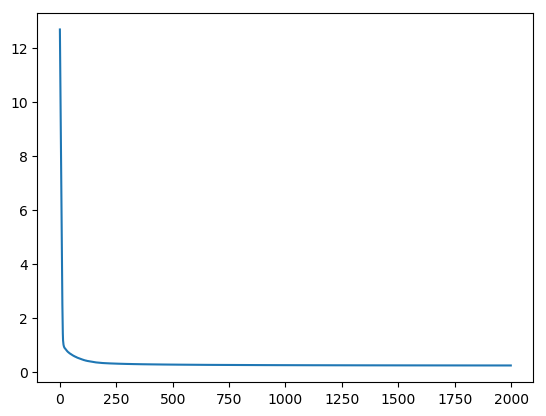

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fda1bba6550>

In [13]:
plot(dm)

In [66]:
L = size(histo_normal_was)[1]

518

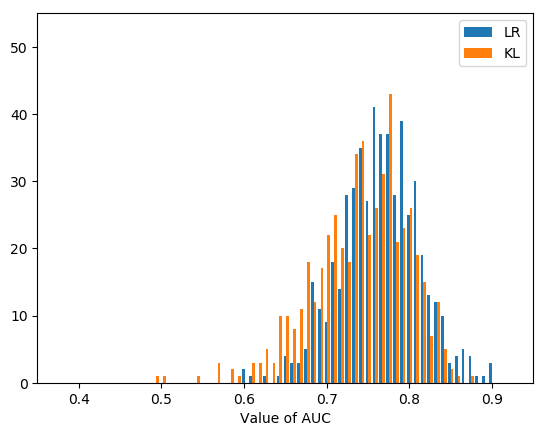

PyObject Text(0.5,24,'Value of AUC')

In [67]:
PyPlot.plt[:hist]([histo_normal[1:L],histo_normal_KL2[1:L]],50, label=["LR","KL"])
# PyPlot.plt[:hist](histo_normal[1:end],20, label="normal")
# PyPlot.plt[:hist](histo_normal_KL2[1:end],20, label="robust")
legend()
xlim(0.35,0.95)
ylim(0, 55)
xlabel("Value of AUC")

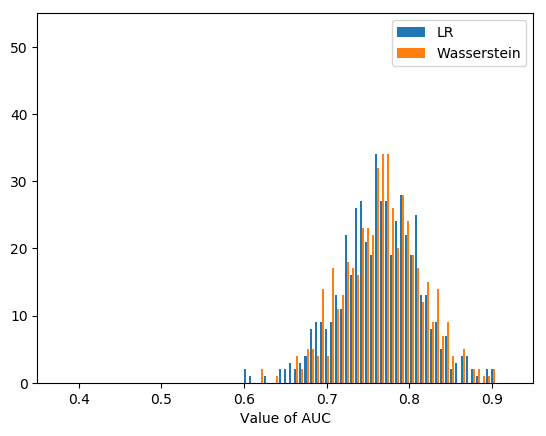

PyObject Text(0.5,24,'Value of AUC')

In [68]:
PyPlot.plt[:hist]([histo_normal[1:L], histo_normal_was[1:L]], 50, label=["LR","Wasserstein"])
legend()
xlim(0.35,0.95)
ylim(0, 55)
xlabel("Value of AUC")

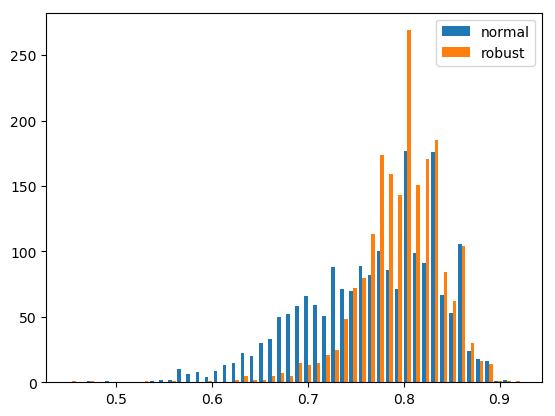

PyObject <matplotlib.legend.Legend object at 0x7f4a552e2b70>

In [46]:
PyPlot.plt[:hist]([histo_as[1:end],histo_as_KL2[1:end]],50, label=["normal","robust"])
# PyPlot.plt[:hist](histo_as[1:end],50, label="normal")
# PyPlot.plt[:hist](histo_as_KL[1:end],50, label="robust")
legend()

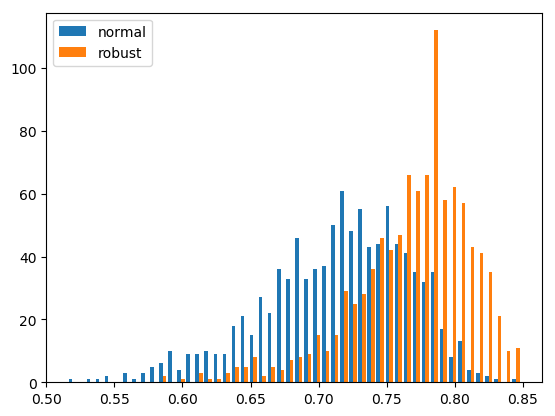

PyObject <matplotlib.legend.Legend object at 0x7fabdd168828>

In [16]:
PyPlot.plt[:hist]([histo_as[1:end],histo_as_was2[1:end]],50, label=["normal","robust"])
# PyPlot.plt[:hist](histo_as[1:end],50, label="normal")
# PyPlot.plt[:hist](histo_as_KL[1:end],50, label="robust")
legend()

In [34]:
open("io-postjpc-variance.txt", "w") do f
    write(f, "histo_normal = ")
    write(f, "$histo_normal \n")
    write(f, "histo_as = ")
    write(f, "$histo_as \n")
    write(f, "histo_normal_KL = ")
    write(f, "$histo_normal_KL \n")
    write(f, "histo_as_KL = ")
    write(f, "$histo_as_KL \n")
    write(f, "histo_normal_was = ")
    write(f, "$histo_normal_was \n")
    write(f, "histo_as_was = ")
    write(f, "$histo_as_was \n")
    write(f, "histo_normal_KL2 = ")
    write(f, "$histo_normal_KL2 \n")
    write(f, "histo_as_KL2 = ")
    write(f, "$histo_as_KL2 \n")
    write(f, "histo_normal_was2 = ")
    write(f, "$histo_normal_was2 \n")
    write(f, "histo_as_was2 = ")
    write(f, "$histo_as_was2 \n")
end

5159